# **Comprehensive Analysis of Global Suicide Trends**


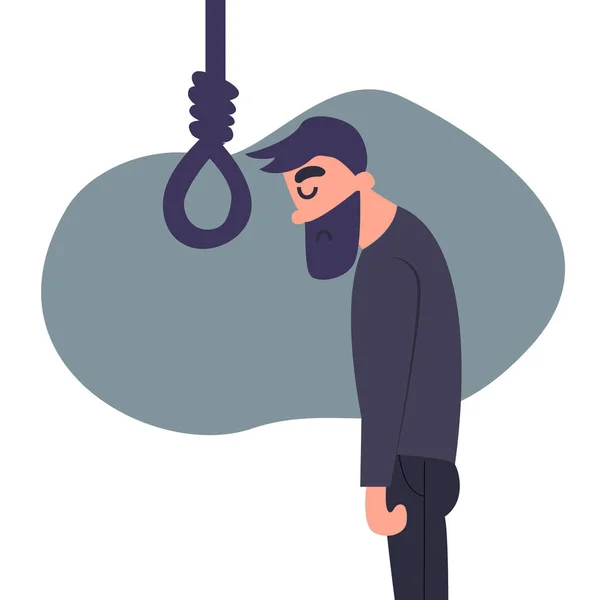!

## Introduction

The suicide dataset provides comprehensive information on suicide statistics across various countries over multiple years. This dataset includes demographic details such as age and gender, as well as economic indicators like GDP and Human Development Index (HDI). The dataset allows for an in-depth analysis of the factors contributing to suicide rates globally, providing valuable insights into patterns and trends that can inform public health strategies and interventions. The primary goal of Exploratory Data Analysis (EDA) on this suicide dataset is to uncover underlying patterns, identify significant trends, and highlight key relationships within the data.

### Key Columns:

1. **Country**: This column lists the name of the country where the data was recorded.
2. **Year**: The year in which the data was collected, allowing for temporal analysis of trends.
3. **Sex**: The gender of the individuals, categorized as male or female.
4. **Age**: The age group of the individuals, divided into specific ranges.
5. **Suicides_no**: The actual number of suicides reported in that specific category.
6. **Population**: The population size of the specific age group and gender within the country for that year.
7. **Suicides/100k pop**: The suicide rate per 100,000 people, providing a normalized measure to compare across different population sizes.
8. **Country-year**: A combined column that merges country and year, useful for multi-dimensional analysis.
9. **HDI for year**: The Human Development Index for the country in that year, although some entries may be missing (NaN).
10. **GDP for year (usd)**: The Gross Domestic Product for the country in that year, expressed in US dollars.
11. **GDP per capita (usd)**: The GDP per capita, giving an economic context to the data.
12. **Generation**: The generational cohort of the individuals, such as Generation X, Boomers, Silent, etc.

### Importance:

Understanding the factors contributing to suicides is crucial for developing targeted interventions and support systems. This dataset can help policymakers, researchers, and public health officials to identify vulnerable groups, track the effectiveness of policies over time, and allocate resources more effectively to prevent suicides.

With this dataset, one can uncover deep insights into the socio-economic and demographic factors influencing suicides globally, aiding in the fight to reduce these tragic incidents.

### Importing Necessary Libraries

In [1]:
# Pandas is used for data manipulation and analysis
import pandas as pd

# Numpy is used for numerical operations
import numpy as np

# Matplotlib is used for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Seaborn is used for making statistical graphics
import seaborn as sns

# Scipy is used for scientific and technical computing
from scipy import stats

# Warnings is used to manage warning messages
import warnings
warnings.filterwarnings('ignore')

# Plotly is used for interactive visualizations
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Confirming the imports
print("Libraries imported successfully.")


Libraries imported successfully.


## Exploratory Data Analysis (EDA)

### Step 1: Data Cleaning and Data Processing
First, let's take a closer look at the data to identify any necessary cleaning steps, such as handling missing values, correcting data types, and addressing any inconsistencies.

**Load the Data**

In [2]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv')

# Display the first few rows of the dataframe
df.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


**Overview of the Data**

In [3]:
df.shape

(27820, 12)

In [4]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [5]:
print(f'column names: {df.columns.to_list()}')

column names: ['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']


In [6]:
# Display basic statistics for numerical columns
df.describe()


,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


**Handling Missing Values**

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


In [8]:
df['HDI for year'].unique()

array([  nan, 0.619, 0.656, 0.695, 0.722, 0.781, 0.783, 0.694, 0.705,
       0.731, 0.762, 0.775, 0.811, 0.818, 0.831, 0.833, 0.836, 0.632,
       0.605, 0.648, 0.721, 0.723, 0.728, 0.733, 0.865, 0.882, 0.898,
       0.927, 0.93 , 0.932, 0.933, 0.935, 0.764, 0.794, 0.815, 0.853,
       0.879, 0.881, 0.884, 0.885, 0.609, 0.64 , 0.778, 0.78 , 0.774,
       0.786, 0.727, 0.816, 0.819, 0.817, 0.821, 0.824, 0.7  , 0.716,
       0.753, 0.765, 0.793, 0.785, 0.683, 0.796, 0.798, 0.806, 0.851,
       0.874, 0.866, 0.883, 0.886, 0.889, 0.888, 0.89 , 0.644, 0.664,
       0.701, 0.71 , 0.711, 0.715, 0.724, 0.576, 0.608, 0.702, 0.737,
       0.742, 0.746, 0.752, 0.755, 0.686, 0.696, 0.713, 0.749, 0.773,
       0.779, 0.782, 0.827, 0.849, 0.861, 0.867, 0.892, 0.903, 0.909,
       0.91 , 0.912, 0.654, 0.699, 0.788, 0.814, 0.83 , 0.832, 0.573,
       0.596, 0.629, 0.679, 0.706, 0.718, 0.72 , 0.623, 0.652, 0.682,
       0.704, 0.75 , 0.756, 0.761, 0.766, 0.807, 0.653, 0.685, 0.73 ,
       0.776, 0.772,

In [9]:
#let's fill the missing 'HDI for year' with the median value
df['HDI for year'].fillna(df['HDI for year'].median(), inplace=True)

In [10]:
df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

**Correcting Data Types**

In [11]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.779,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.779,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.779,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.779,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.779,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [12]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [13]:
# Strip any whitespace characters from the column names
df.columns = df.columns.str.strip()

# Display the cleaned column names
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [14]:
# Convert 'gdp_for_year ($)' to numeric, removing commas
df['gdp_for_year ($)'] = df['gdp_for_year ($)'].str.replace(',', '').astype(float)


In [15]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
gdp_for_year ($)      float64
gdp_per_capita ($)      int64
generation             object
dtype: object

**Handling Duplicates**

In [16]:
df.duplicated().sum()


0

### Step 2: Data Exploration and Visualization

### Geospatial Analysis

In [17]:
# How many unique countries are there?
df.country.nunique()

101

In [18]:
# List the unique country names
country_names = df['country'].unique()

# Display the list of country names
print(country_names)

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

In [19]:
# Create a DataFrame with the unique country names
country_df = pd.DataFrame(country_names, columns=['country'])
country_df

,country
0,Albania
1,Antigua and Barbuda
2,Argentina
3,Armenia
4,Aruba
...,...
96,United Arab Emirates
97,United Kingdom
98,United States
99,Uruguay


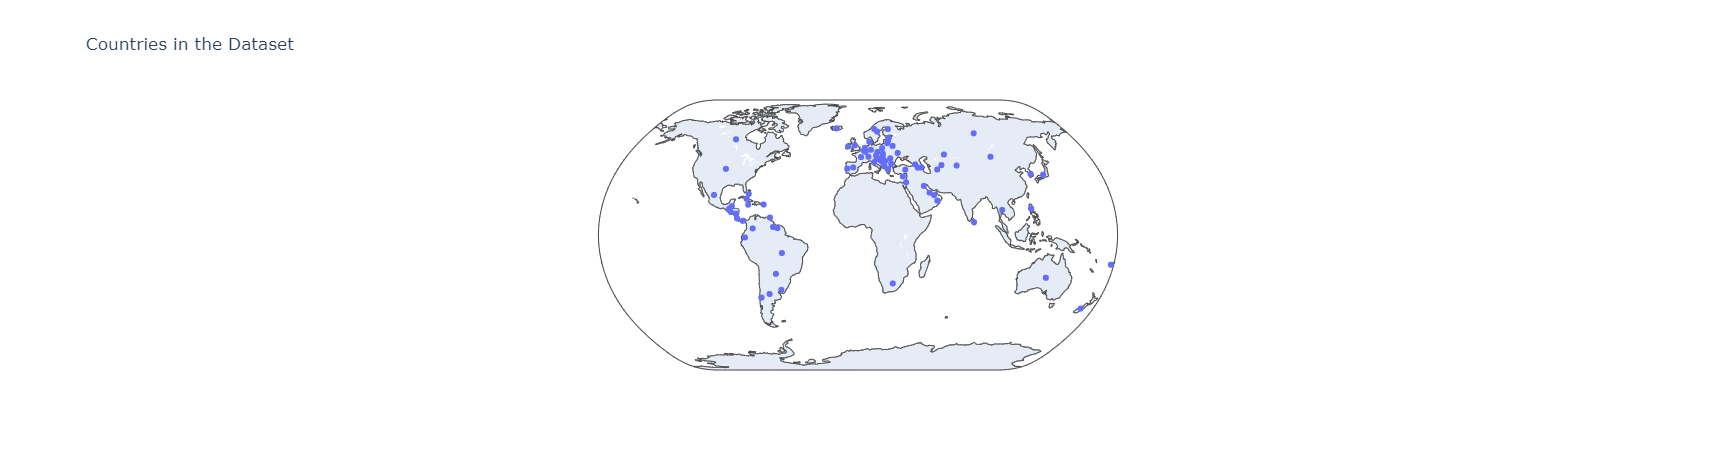

In [20]:
# Create a map with the countries marked
fig = px.scatter_geo(country_df, 
                     locations='country',
                     locationmode='country names',
                     title='Countries in the Dataset',
                     projection='natural earth')

# Show the map
fig.show()

In [21]:
# List of countries
countries = ['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia',
             'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium',
             'Belize', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
             'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
             'Czech Republic', 'Denmark', 'Dominica', 'Ecuador', 'El Salvador', 'Estonia',
             'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada',
             'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy',
             'Jamaica', 'Japan', 'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
             'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta', 'Mauritius', 'Mexico',
             'Mongolia', 'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway',
             'Oman', 'Panama', 'Paraguay', 'Philippines', 'Poland', 'Portugal',
             'Puerto Rico', 'Qatar', 'Republic of Korea', 'Romania', 'Russian Federation',
             'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and Grenadines',
             'San Marino', 'Serbia', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia',
             'South Africa', 'Spain', 'Sri Lanka', 'Suriname', 'Sweden', 'Switzerland',
             'Thailand', 'Trinidad and Tobago', 'Turkey', 'Turkmenistan', 'Ukraine',
             'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay',
             'Uzbekistan']

# Dictionary mapping countries to continents
country_continent_map = {
    'Albania': 'Europe', 'Antigua and Barbuda': 'North America', 'Argentina': 'South America',
    'Armenia': 'Asia', 'Aruba': 'North America', 'Australia': 'Australia',
    'Austria': 'Europe', 'Azerbaijan': 'Asia', 'Bahamas': 'North America',
    'Bahrain': 'Asia', 'Barbados': 'North America', 'Belarus': 'Europe',
    'Belgium': 'Europe', 'Belize': 'North America', 'Bosnia and Herzegovina': 'Europe',
    'Brazil': 'South America', 'Bulgaria': 'Europe', 'Cabo Verde': 'Africa',
    'Canada': 'North America', 'Chile': 'South America', 'Colombia': 'South America',
    'Costa Rica': 'North America', 'Croatia': 'Europe', 'Cuba': 'North America',
    'Cyprus': 'Asia', 'Czech Republic': 'Europe', 'Denmark': 'Europe',
    'Dominica': 'North America', 'Ecuador': 'South America', 'El Salvador': 'North America',
    'Estonia': 'Europe', 'Fiji': 'Australia', 'Finland': 'Europe', 'France': 'Europe',
    'Georgia': 'Asia', 'Germany': 'Europe', 'Greece': 'Europe', 'Grenada': 'North America',
    'Guatemala': 'North America', 'Guyana': 'South America', 'Hungary': 'Europe',
    'Iceland': 'Europe', 'Ireland': 'Europe', 'Israel': 'Asia', 'Italy': 'Europe',
    'Jamaica': 'North America', 'Japan': 'Asia', 'Kazakhstan': 'Asia', 'Kiribati': 'Australia',
    'Kuwait': 'Asia', 'Kyrgyzstan': 'Asia', 'Latvia': 'Europe', 'Lithuania': 'Europe',
    'Luxembourg': 'Europe', 'Macau': 'Asia', 'Maldives': 'Asia', 'Malta': 'Europe',
    'Mauritius': 'Africa', 'Mexico': 'North America', 'Mongolia': 'Asia',
    'Montenegro': 'Europe', 'Netherlands': 'Europe', 'New Zealand': 'Australia',
    'Nicaragua': 'North America', 'Norway': 'Europe', 'Oman': 'Asia', 'Panama': 'North America',
    'Paraguay': 'South America', 'Philippines': 'Asia', 'Poland': 'Europe',
    'Portugal': 'Europe', 'Puerto Rico': 'North America', 'Qatar': 'Asia',
    'Republic of Korea': 'Asia', 'Romania': 'Europe', 'Russian Federation': 'Europe',
    'Saint Kitts and Nevis': 'North America', 'Saint Lucia': 'North America',
    'Saint Vincent and Grenadines': 'North America', 'San Marino': 'Europe',
    'Serbia': 'Europe', 'Seychelles': 'Africa', 'Singapore': 'Asia',
    'Slovakia': 'Europe', 'Slovenia': 'Europe', 'South Africa': 'Africa',
    'Spain': 'Europe', 'Sri Lanka': 'Asia', 'Suriname': 'South America',
    'Sweden': 'Europe', 'Switzerland': 'Europe', 'Thailand': 'Asia',
    'Trinidad and Tobago': 'North America', 'Turkey': 'Asia', 'Turkmenistan': 'Asia',
    'Ukraine': 'Europe', 'United Arab Emirates': 'Asia', 'United Kingdom': 'Europe',
    'United States': 'North America', 'Uruguay': 'South America', 'Uzbekistan': 'Asia'
}

# Create a DataFrame from the dictionary
country_continent_df = pd.DataFrame(list(country_continent_map.items()), columns=['country', 'continent'])

# Display the DataFrame
country_continent_df


,country,continent
0,Albania,Europe
1,Antigua and Barbuda,North America
2,Argentina,South America
3,Armenia,Asia
4,Aruba,North America
...,...,...
96,United Arab Emirates,Asia
97,United Kingdom,Europe
98,United States,North America
99,Uruguay,South America


In [22]:
# Merge original dataframe `df` with `country_continent_df` on the 'country' column
df = pd.merge(df, country_continent_df, on='country')

In [23]:
## number of countries in each continent

continent_counts = df.groupby('continent')['country'].nunique()

# Convert the result to a dictionary for easier listing
continent_counts_dict = continent_counts.to_dict()

# Print the continent and the number of countries
for continent, count in continent_counts_dict.items():
    print(f"Continent: {continent}, Number of Countries: {count}")

Continent: Africa, Number of Countries: 4
Continent: Asia, Number of Countries: 24
Continent: Australia, Number of Countries: 4
Continent: Europe, Number of Countries: 38
Continent: North America, Number of Countries: 22
Continent: South America, Number of Countries: 9


In [24]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.779,2.156625e+09,796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.779,2.156625e+09,796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.779,2.156625e+09,796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.779,2.156625e+09,796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.779,2.156625e+09,796,Boomers,Europe


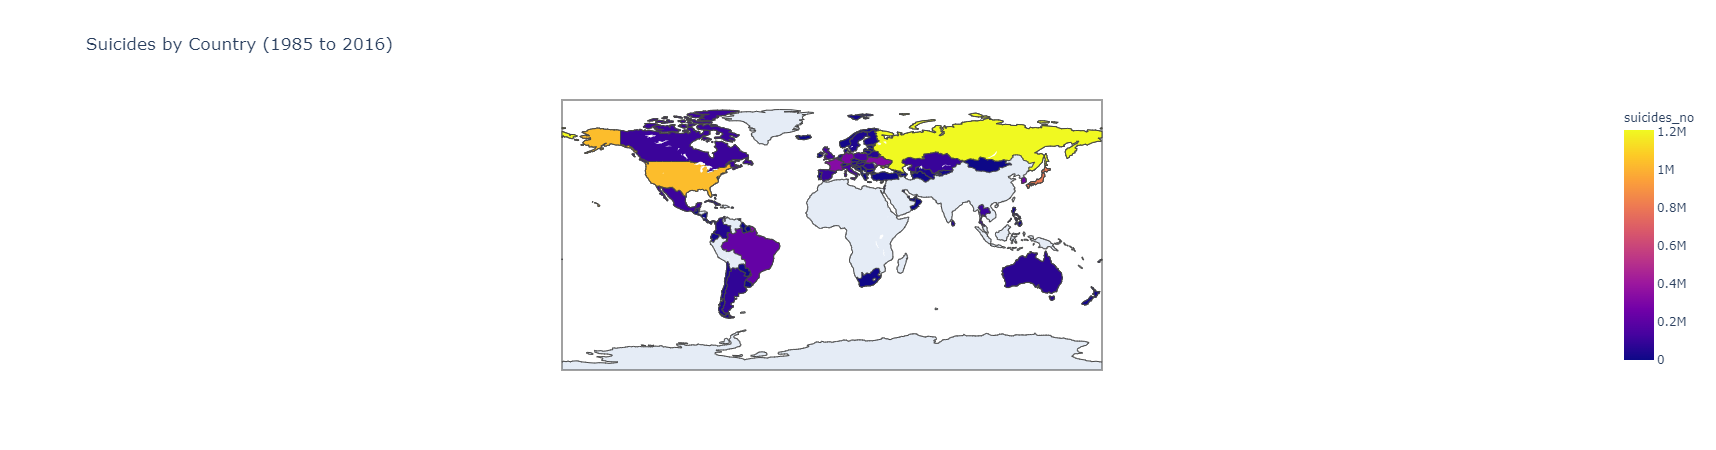

In [25]:
# How suicides are spread out among different countries 
country_suicides = df.groupby('country')['suicides_no'].sum().reset_index()

fig = px.choropleth(country_suicides, 
                    locations='country', 
                    locationmode='country names', 
                    color='suicides_no', 
                    title='Suicides by Country (1985 to 2016)',
                    hover_name='country', 
                    color_continuous_scale='Plasma')

fig.show()

In [26]:
sorted_country_suicides = country_suicides.sort_values(by='suicides_no', ascending=False)

sorted_country_suicides.style.background_gradient(cmap='Oranges', subset=['suicides_no'])

,country,suicides_no
75,Russian Federation,1209742
98,United States,1034013
46,Japan,806902
33,France,329127
95,Ukraine,319950
35,Germany,291262
73,Republic of Korea,261730
15,Brazil,226613
69,Poland,139098
97,United Kingdom,136805


From thew above analysis among 101 countries, we can see that the Russian Federation and the United States exhibit the highest suicide numbers in 32 years, with 1,209,742 and 1,034,013 suicides respectively. Asian countries like Japan and South Korea also show high figures, with 806,902 and 261,730 suicides respectively, highlighting a critical issue in this region.

European countries such as France, Ukraine, and Germany follow, each with substantial suicide numbers, indicating that suicide is a significant concern across Europe. Brazil represents the highest figures in South America with 226,613 suicides.

In contrast, many smaller nations and island countries, such as Saint Kitts and Nevis, Dominica, and San Marino, report very low or zero suicides. This could be attributed to their smaller populations or potentially underreporting issues.

Overall, the data underscores the need for targeted mental health and suicide prevention efforts in countries with higher suicide rates, while also indicating areas where additional data collection and reporting might be needed. The wide range in numbers points to differing social, economic, and cultural factors influencing suicide rates across the globe.

#### countries with the average suicide rates per 100k population 

In [27]:
# Group by country and calculate the mean suicide rate per 100k population
country_suicide_rates = df.groupby('country')['suicides/100k pop'].mean().sort_values(ascending=False)
country_suicide_rates

country
Lithuania                40.415573
Sri Lanka                35.295152
Russian Federation       34.892377
Hungary                  32.761516
Belarus                  31.075913
                           ...    
Oman                      0.736111
Antigua and Barbuda       0.552901
Jamaica                   0.521765
Saint Kitts and Nevis     0.000000
Dominica                  0.000000
Name: suicides/100k pop, Length: 101, dtype: float64

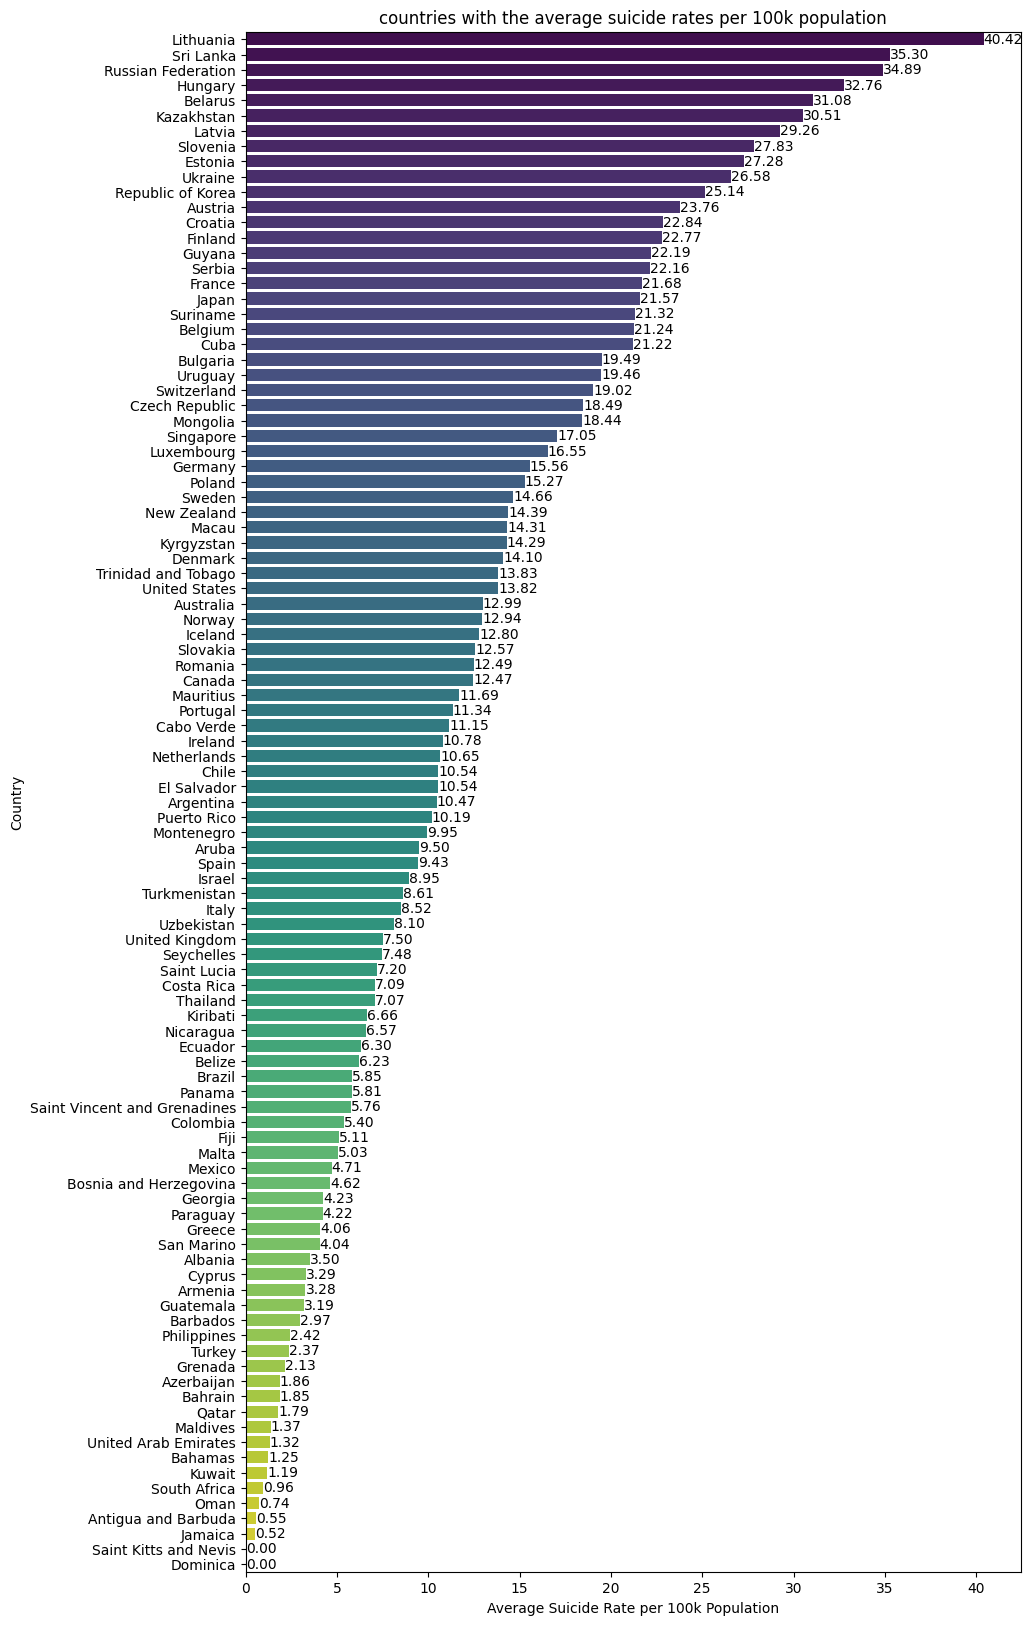

In [28]:
# Set the plot size
plt.figure(figsize=(10, 20))

# Create a bar plot
bar_plot = sns.barplot(x=country_suicide_rates.values, y=country_suicide_rates.index, palette='viridis')

# Add titles and labels
plt.title('countries with the average suicide rates per 100k population')
plt.xlabel('Average Suicide Rate per 100k Population')
plt.ylabel('Country')

# Add values on top of the bars
for index, value in enumerate(country_suicide_rates.values):
    bar_plot.text(value, index, f'{value:.2f}', va='center')
    
# Show the plot
plt.show()

The analysis reveals that the top 5 countries with the highest average suicide rates per 100k population are Lithuania, Sri Lanka, the Russian Federation, Hungary, and Belarus. Lithuania stands out with the highest rate, indicating a severe public health issue that needs urgent attention. Sri Lanka follows, highlighting significant mental health challenges in the region. The Russian Federation, despite its large population, also exhibits alarmingly high suicide rates, pointing to deep-rooted societal and economic issues. Hungary and Belarus round out the top five, reflecting similar struggles in these Eastern European countries. These findings underscore the need for targeted mental health interventions, increased awareness, and comprehensive support systems to address the high suicide rates in these countries.

### Global Annual Suicides

In [29]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.779,2.156625e+09,796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.779,2.156625e+09,796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.779,2.156625e+09,796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.779,2.156625e+09,796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.779,2.156625e+09,796,Boomers,Europe


In [30]:
df[['year', 'suicides_no']]

,year,suicides_no
0,1987,21
1,1987,16
2,1987,14
3,1987,1
4,1987,9
...,...,...
27815,2014,107
27816,2014,9
27817,2014,60
27818,2014,44


In [31]:
suicides_per_year = df.groupby('year')['suicides_no'].sum().reset_index()
suicides_per_year

,year,suicides_no
0,1985,116063
1,1986,120670
2,1987,126842
3,1988,121026
4,1989,160244
5,1990,193361
6,1991,198020
7,1992,211473
8,1993,221565
9,1994,232063


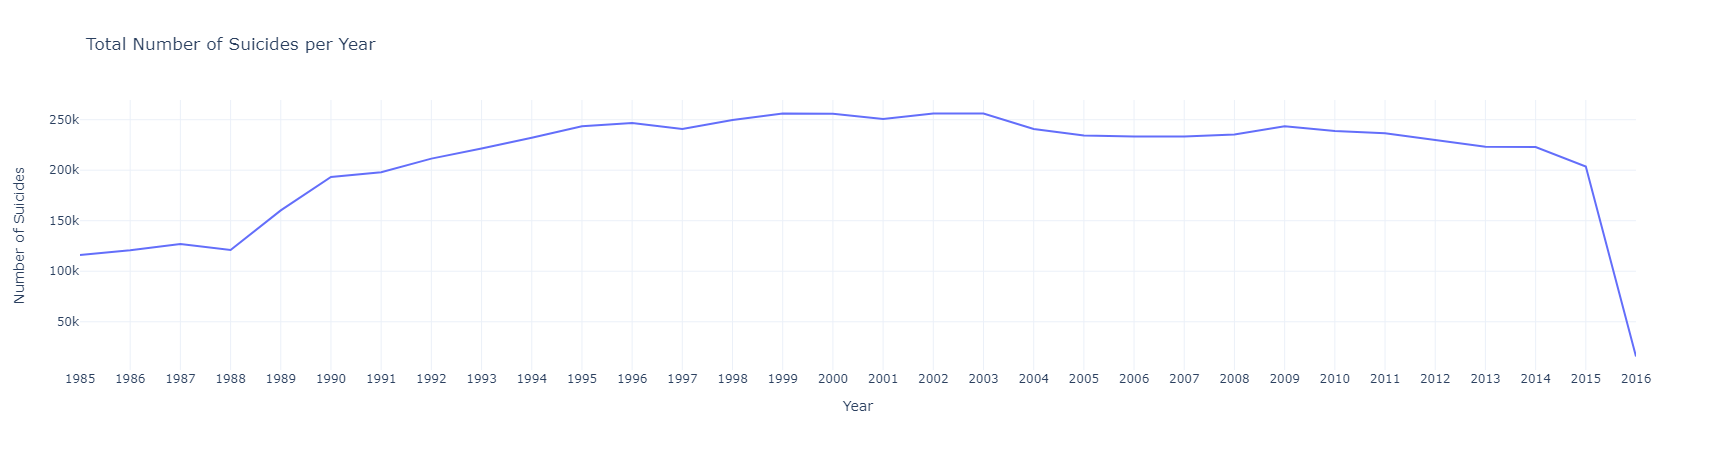

In [32]:
# Plotly interactive plot
fig = px.line(suicides_per_year, x='year', y='suicides_no', title='Total Number of Suicides per Year')

# Update layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Suicides',
    xaxis=dict(type='category'),
    yaxis=dict(type='linear'),
    hovermode='x unified',
    template='plotly_white'
)

# Show the plot
fig.show()


The data on global annual suicides from 1985 to 2016 shows a fluctuating trend in the number of suicides each year. There is a noticeable increase from 116,063 suicides in 1985 to a peak of 256,119 in 1999. This upward trend continues with slight variations, reaching another high of 256,095 in 2002. Following this period, there is a gradual decline, with some fluctuations, leading to 203,640 suicides in 2015. The dramatic drop to 15,603 suicides in 2016 appears anomalous, suggesting potential data recording issues for that year.

### Global Annual Suicide Rate per 100k Population

In [33]:
# Aggregate the data by year
annual_data = df.groupby('year').agg({'suicides_no': 'sum', 'population': 'sum'}).reset_index()

# Calculate the suicide rate per 100k population
annual_data['suicide_rate_per_100k'] = (annual_data['suicides_no'] / annual_data['population']) * 100000

# Display the resulting table
annual_data[['year', 'suicide_rate_per_100k']]


,year,suicide_rate_per_100k
0,1985,11.507336
1,1986,11.716562
2,1987,11.583430
3,1988,11.481514
4,1989,13.075653
5,1990,13.184123
6,1991,13.290036
7,1992,13.473570
8,1993,14.477430
9,1994,14.983896


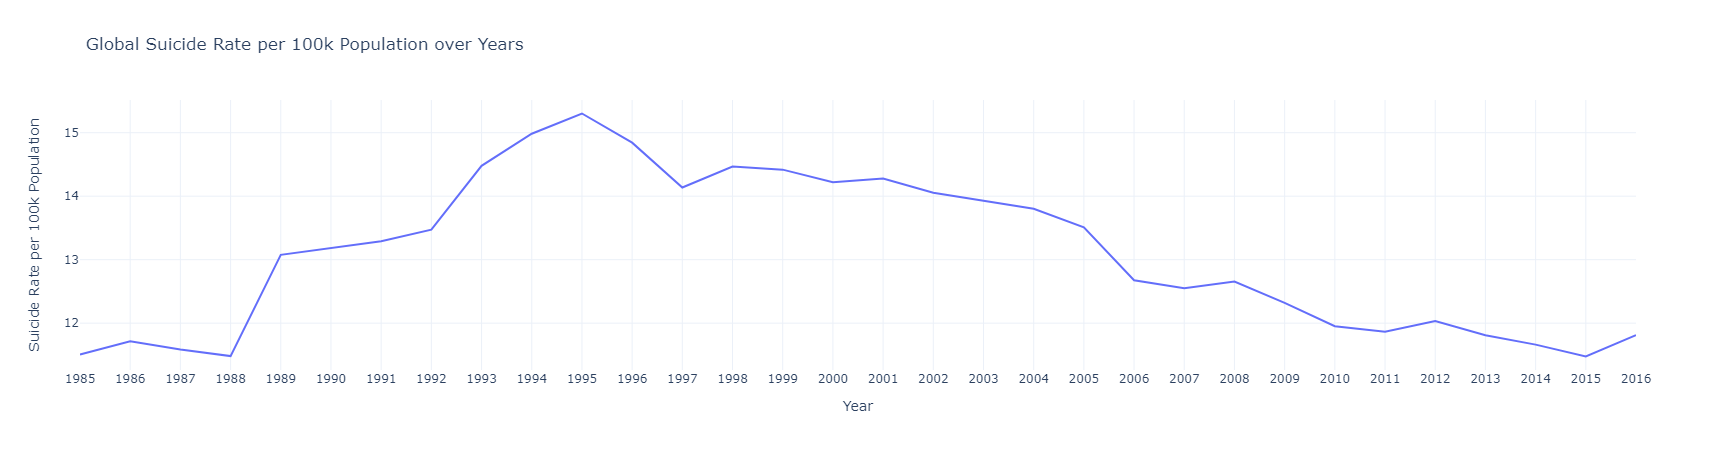

In [34]:
# Plotly interactive plot
fig = px.line(annual_data, x='year', y='suicide_rate_per_100k', title='Global Suicide Rate per 100k Population over Years')

# Update layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Suicide Rate per 100k Population',
    xaxis=dict(type='category'),
    yaxis=dict(type='linear'),
    hovermode='x unified',
    template='plotly_white'
)

# Show the plot
fig.show()

 This data indicates that while there were periods of increase, particularly in the late 1980s and early 1990s, there has been a general downward trend in the global suicide rate since the mid-1990s.
 This could be attributed to various factors, including improved mental health awareness, better access to mental health services, and socio-economic changes.

### Suicides by Age Globally

In [35]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.779,2.156625e+09,796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.779,2.156625e+09,796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.779,2.156625e+09,796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.779,2.156625e+09,796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.779,2.156625e+09,796,Boomers,Europe


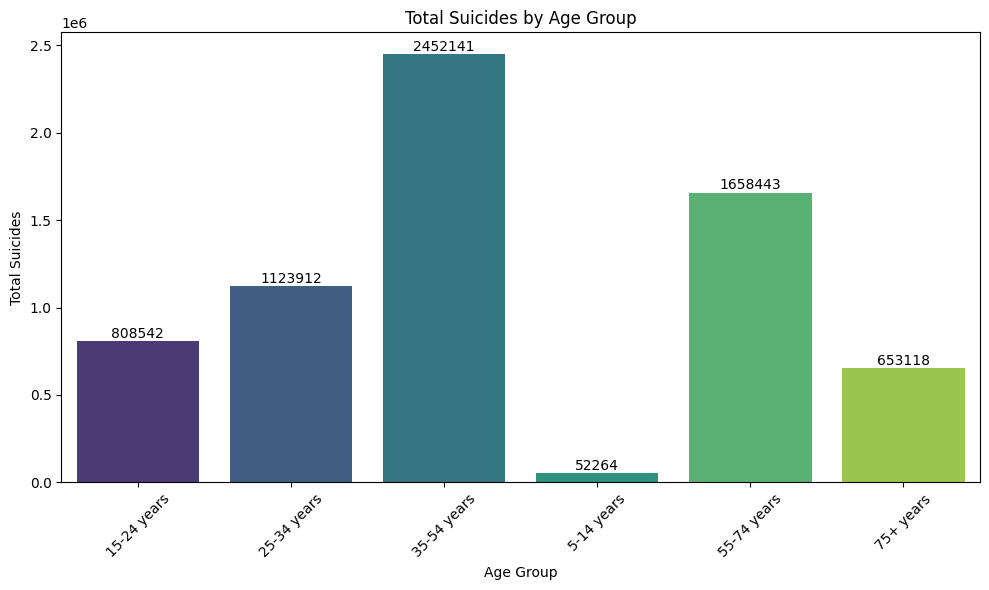

In [36]:
# Aggregate data by age group
suicides_by_age = df.groupby('age')['suicides_no'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=suicides_by_age, x='age', y='suicides_no', palette='viridis')
plt.title('Total Suicides by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Suicides')
plt.xticks(rotation=45)
plt.grid(False)

# Adding values on top of the bars
for index, row in suicides_by_age.iterrows():
    plt.text(index, row['suicides_no'] + 100, row['suicides_no'], ha='center', va='bottom')

plt.tight_layout()
plt.show()

The analysis of suicides by age group reveals compelling trends: individuals aged 35-54 years recorded the highest number of suicides, closely followed by those aged 55-74 years. Conversely, the youngest age group, 5-14 years, reported the fewest suicides. This data underscores a notable tendency towards higher suicide rates among middle-aged individuals compared to younger age groups.

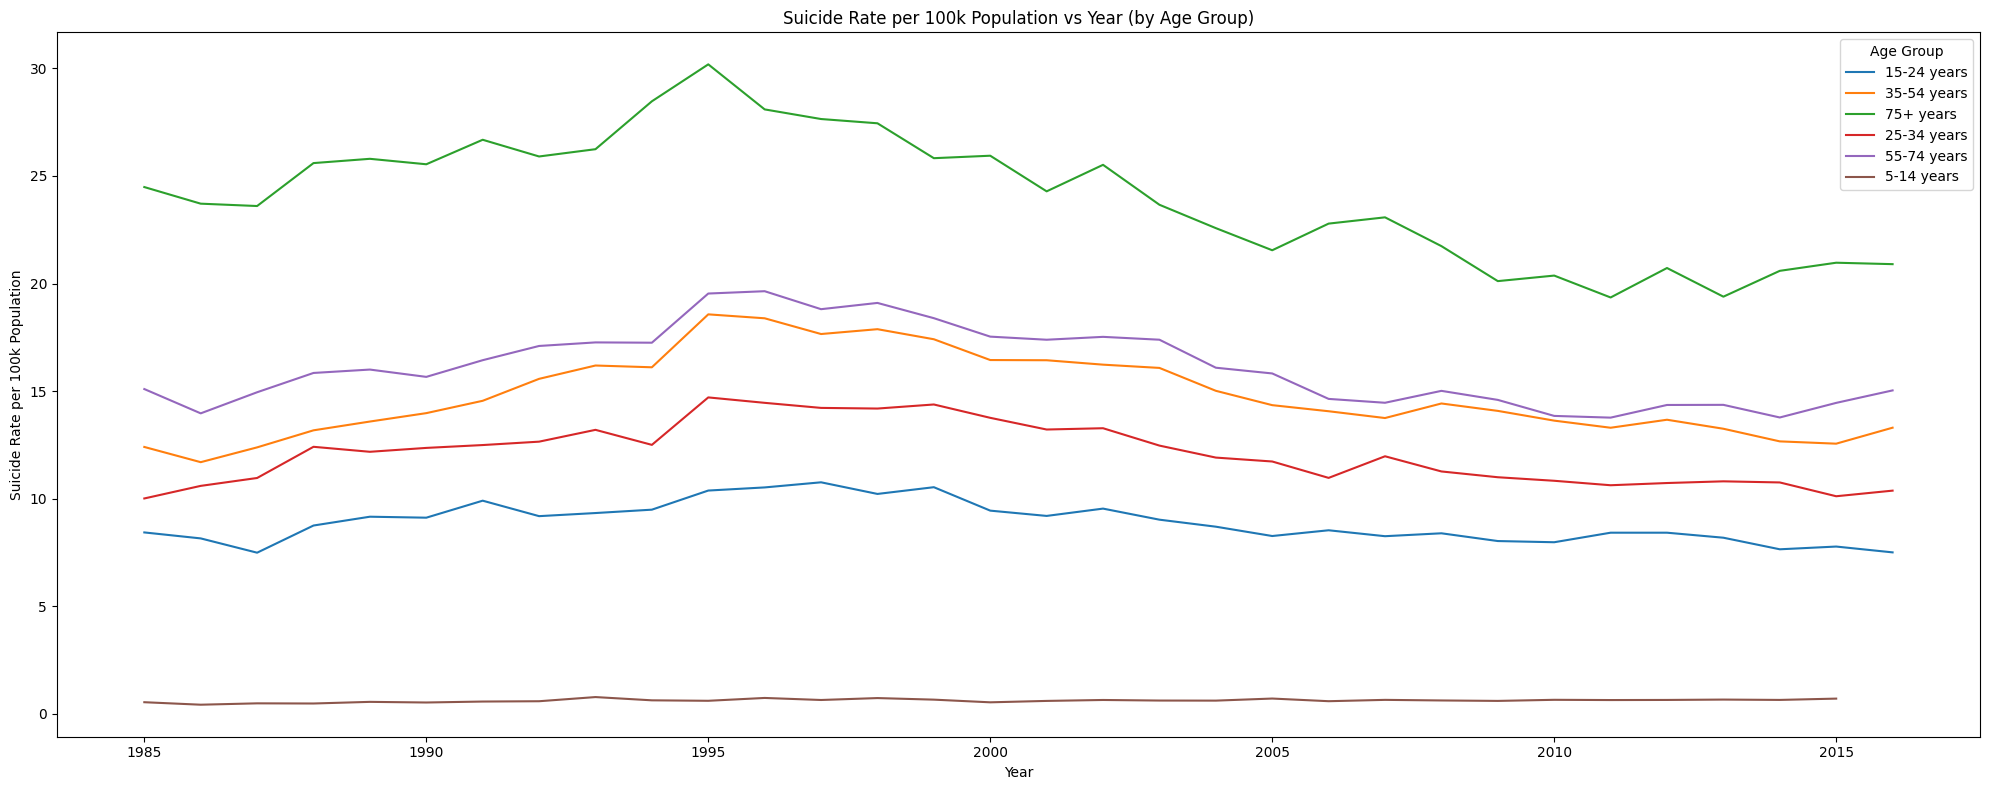

In [37]:
plt.figure(figsize=(20, 8))

sns.lineplot(data=df, x='year', y='suicides/100k pop', hue='age', ci=None)
plt.title('Suicide Rate per 100k Population vs Year (by Age Group)')
plt.xlabel('Year')
plt.ylabel('Suicide Rate per 100k Population')
plt.grid(False)
plt.legend(title='Age Group', loc='upper right')
plt.tight_layout()
plt.show()

Among different age groups, individuals aged 75 years and older exhibit the highest rate of suicide per 100,000 people, indicating a disproportionate incidence compared to other age groups. However, there is a positive trend indicating an overall decrease in these tragic events over the years. 

### Suicide by Gender Globally

In [38]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.779,2.156625e+09,796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.779,2.156625e+09,796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.779,2.156625e+09,796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.779,2.156625e+09,796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.779,2.156625e+09,796,Boomers,Europe


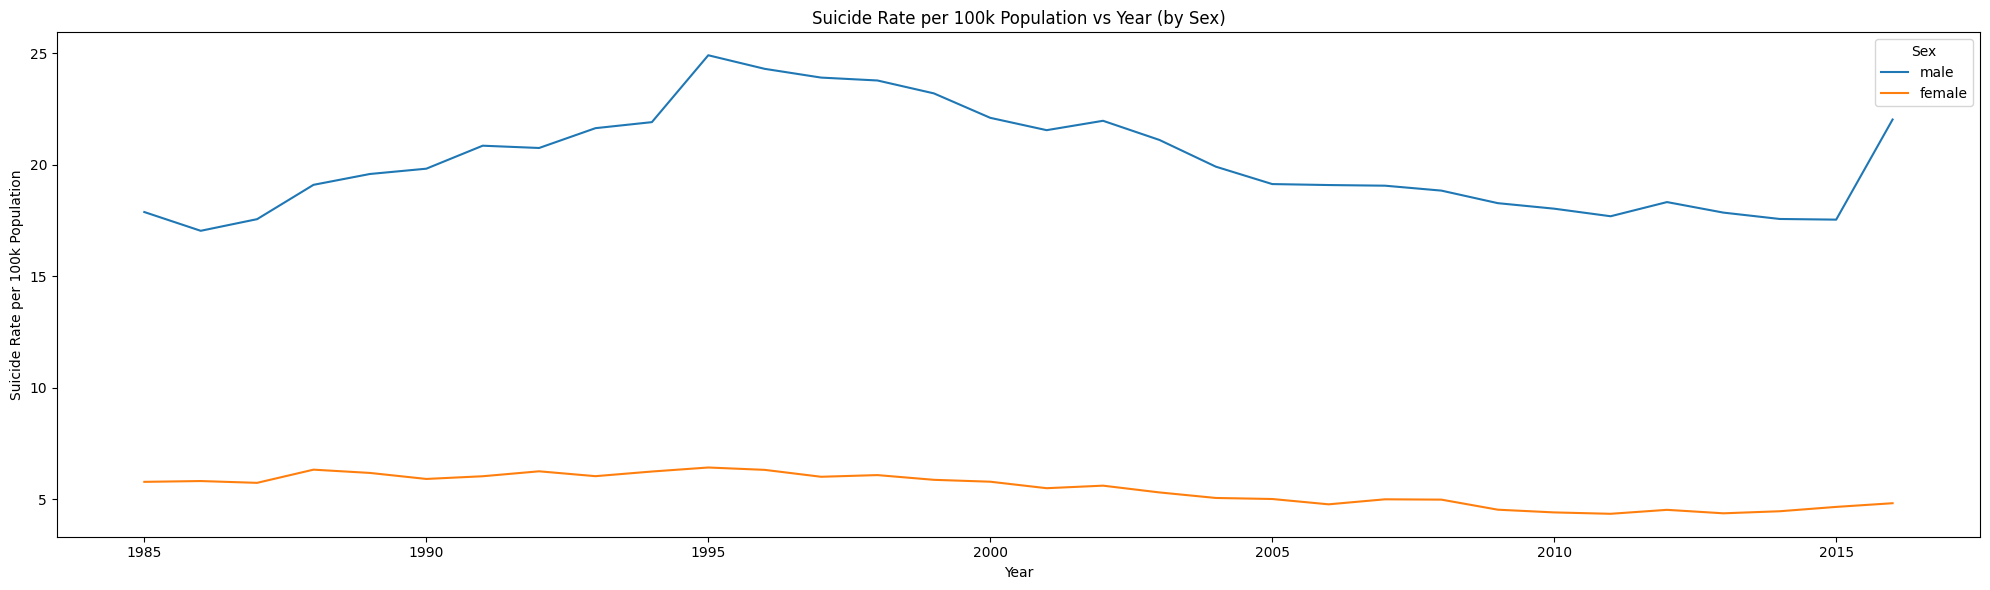

In [39]:
# Plotting using seaborn
plt.figure(figsize=(20, 6))

sns.lineplot(data=df, x='year', y='suicides/100k pop', hue='sex', ci=None)

plt.title('Suicide Rate per 100k Population vs Year (by Sex)')
plt.xlabel('Year')
plt.ylabel('Suicide Rate per 100k Population')
plt.grid(False)
plt.legend(title='Sex', loc='upper right')
plt.tight_layout()
plt.show()

This data underscores a notable tendency towards higher suicide rates among males compared to females, though the trend shows a decreasing pattern over time.

<Figure size 2000x600 with 0 Axes>

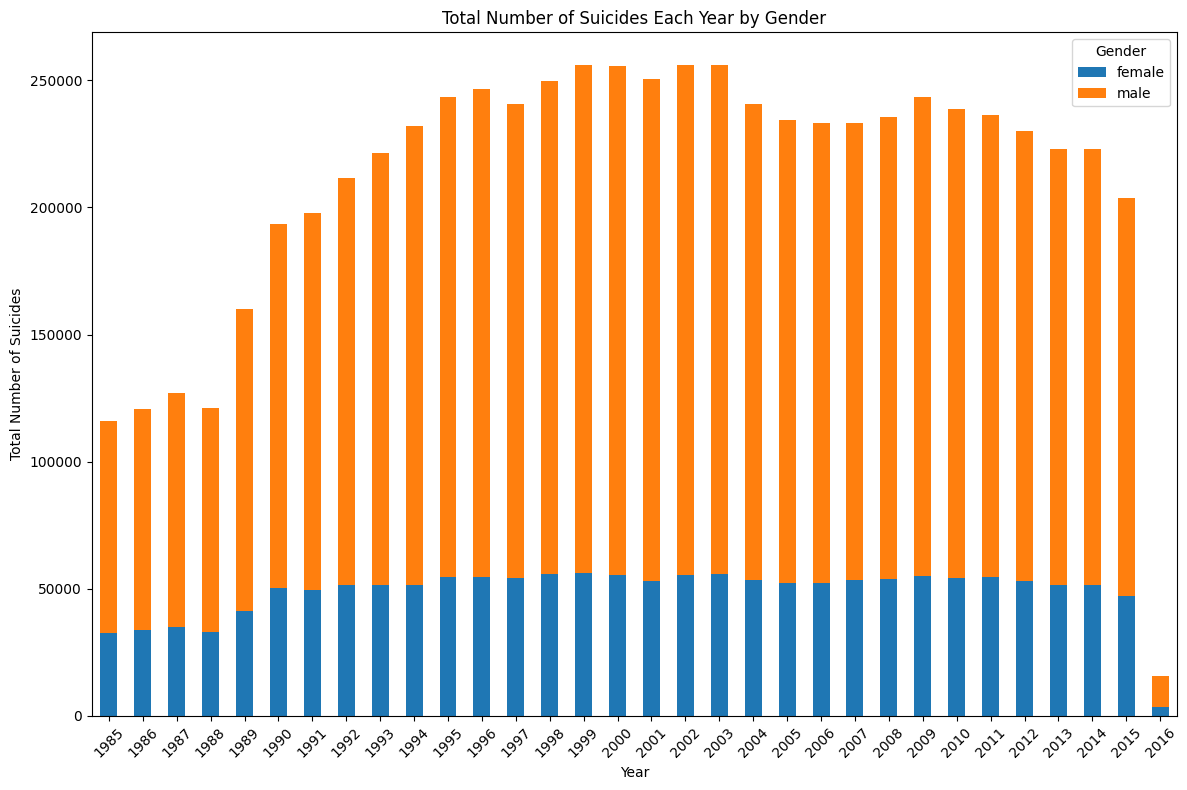

In [40]:
# Aggregate data by year and sex
suicides_by_year_sex = df.groupby(['year', 'sex'])['suicides_no'].sum().reset_index()

# Pivot the dataframe for easier plotting
pivot_df = suicides_by_year_sex.pivot(index='year', columns='sex', values='suicides_no')

# Plotting the stacked bar plot
plt.figure(figsize=(20, 6))
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Total Number of Suicides Each Year by Gender')
plt.xlabel('Year')
plt.ylabel('Total Number of Suicides')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

It is evident that globally, males consistently have higher rates of suicide compared to females each year.


### Impact of socio-economic factors

#### 1. HDI (Human Development Index)

In [41]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.779,2.156625e+09,796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.779,2.156625e+09,796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.779,2.156625e+09,796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.779,2.156625e+09,796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.779,2.156625e+09,796,Boomers,Europe


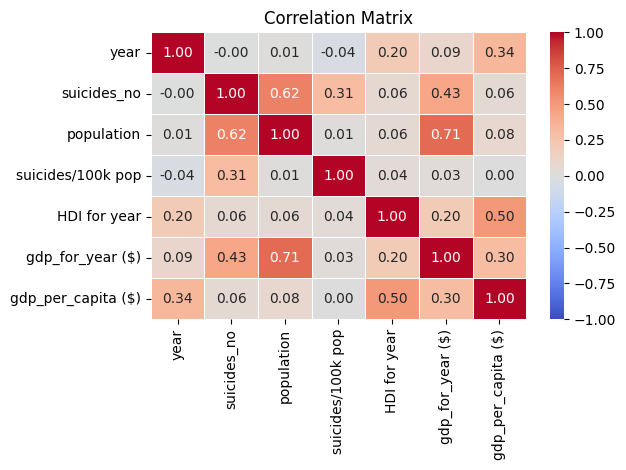

In [42]:
# Selecting numerical columns for correlation matrix
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculating correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plotting the correlation matrix

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [43]:
# Group by country to calculate the average HDI and average suicide rate per 100k population
country_hdi_suicide = df.groupby('country').agg({
    'HDI for year': 'mean',
    'suicides/100k pop': 'mean'
}).reset_index()

# Rename columns for clarity
country_hdi_suicide.columns = ['country', 'average_HDI', 'average_suicide_rate_per_100k']
country_hdi_suicide

,country,average_HDI,average_suicide_rate_per_100k
0,Albania,0.759727,3.502879
1,Antigua and Barbuda,0.779296,0.552901
2,Argentina,0.779194,10.469328
3,Armenia,0.750369,3.275872
4,Aruba,0.779000,9.503095
...,...,...,...
96,United Arab Emirates,0.794333,1.317917
97,United Kingdom,0.806258,7.502473
98,United States,0.815323,13.819812
99,Uruguay,0.768571,19.461190


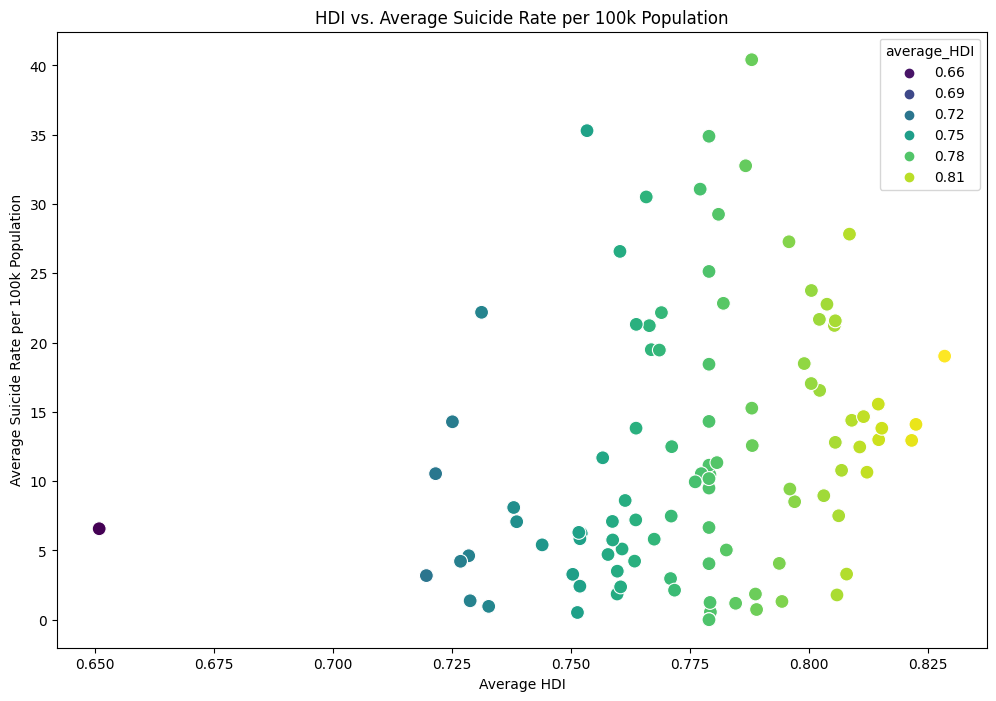

In [46]:
# Plotting
plt.figure(figsize=(12, 8))

sns.scatterplot(data=country_hdi_suicide,
                x='average_HDI', 
                y='average_suicide_rate_per_100k',
                hue='average_HDI', 
                palette='viridis', 
                s=100)

plt.title('HDI vs. Average Suicide Rate per 100k Population')
plt.xlabel('Average HDI')
plt.ylabel('Average Suicide Rate per 100k Population')

plt.grid(False)
plt.show()

The above plot reveals more complex patterns within the data, indicating that high socio-economic development does not necessarily correlate with lower suicide rates. For instance, some high HDI countries still exhibit high suicide rates, suggesting that other factors, such as cultural attitudes towards mental health, social support systems, and economic pressures, play significant roles.

#### 2. GDP per Capita

In [47]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.779,2.156625e+09,796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.779,2.156625e+09,796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.779,2.156625e+09,796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.779,2.156625e+09,796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.779,2.156625e+09,796,Boomers,Europe


In [48]:
# Group by country to calculate the average GDP per capita and average suicide rate per 100k population
country_gdp_suicide = df.groupby('country').agg({
    'gdp_per_capita ($)': 'mean',
    'suicides/100k pop': 'mean'
}).reset_index()

# Rename columns for clarity
country_gdp_suicide.columns = ['country', 'average_gdp_per_capita', 'average_suicide_rate_per_100k']
country_gdp_suicide

,country,average_gdp_per_capita,average_suicide_rate_per_100k
0,Albania,1859.045455,3.502879
1,Antigua and Barbuda,10448.185185,0.552901
2,Argentina,7914.096774,10.469328
3,Armenia,1873.919463,3.275872
4,Aruba,24221.642857,9.503095
...,...,...,...
96,United Arab Emirates,42162.000000,1.317917
97,United Kingdom,31908.354839,7.502473
98,United States,39269.612903,13.819812
99,Uruguay,7622.071429,19.461190


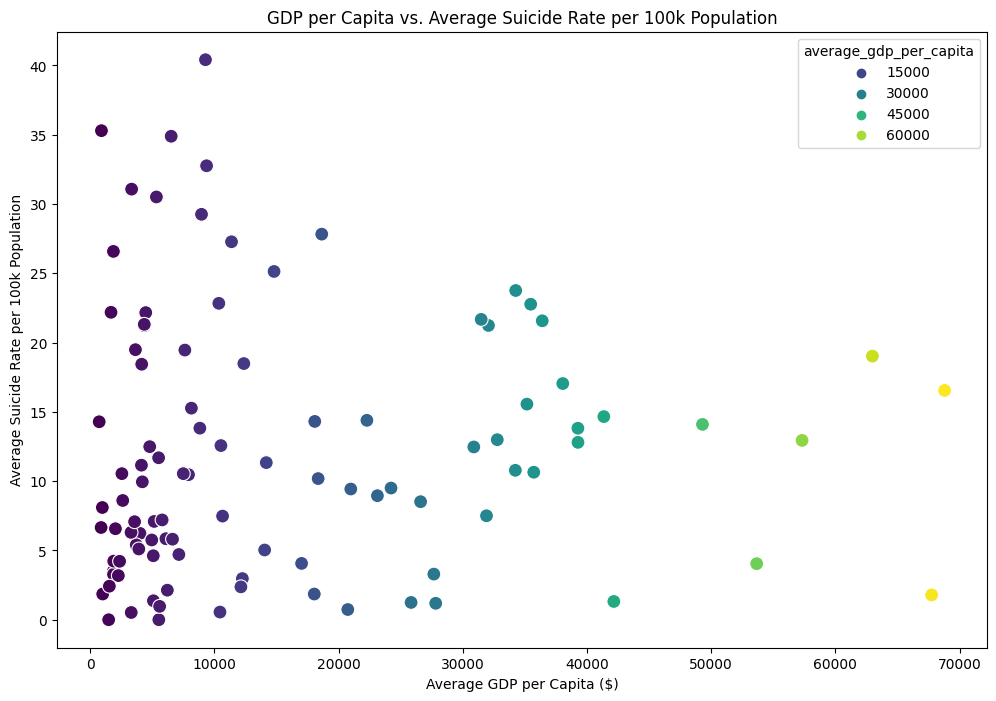

In [50]:
# Plotting
plt.figure(figsize=(12, 8))

sns.scatterplot(data=country_gdp_suicide, 
                x='average_gdp_per_capita',
                y='average_suicide_rate_per_100k'
                , hue='average_gdp_per_capita', 
                palette='viridis',
                s=100)

plt.title('GDP per Capita vs. Average Suicide Rate per 100k Population')
plt.xlabel('Average GDP per Capita ($)')
plt.ylabel('Average Suicide Rate per 100k Population')

plt.grid(False)
plt.show()

Above plot indicates that higher economic prosperity does not necessarily correlate with lower suicide rates. For instance, some high GDP per capita countries still exhibit high suicide rates, suggesting that economic factors alone are not sufficient to determine mental health outcomes. Conversely, some lower GDP per capita countries have lower suicide rates, potentially due to cultural factors, social support systems, or underreporting issues.

## Suicide Rate by Generation

In [51]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.779,2.156625e+09,796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.779,2.156625e+09,796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.779,2.156625e+09,796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.779,2.156625e+09,796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.779,2.156625e+09,796,Boomers,Europe


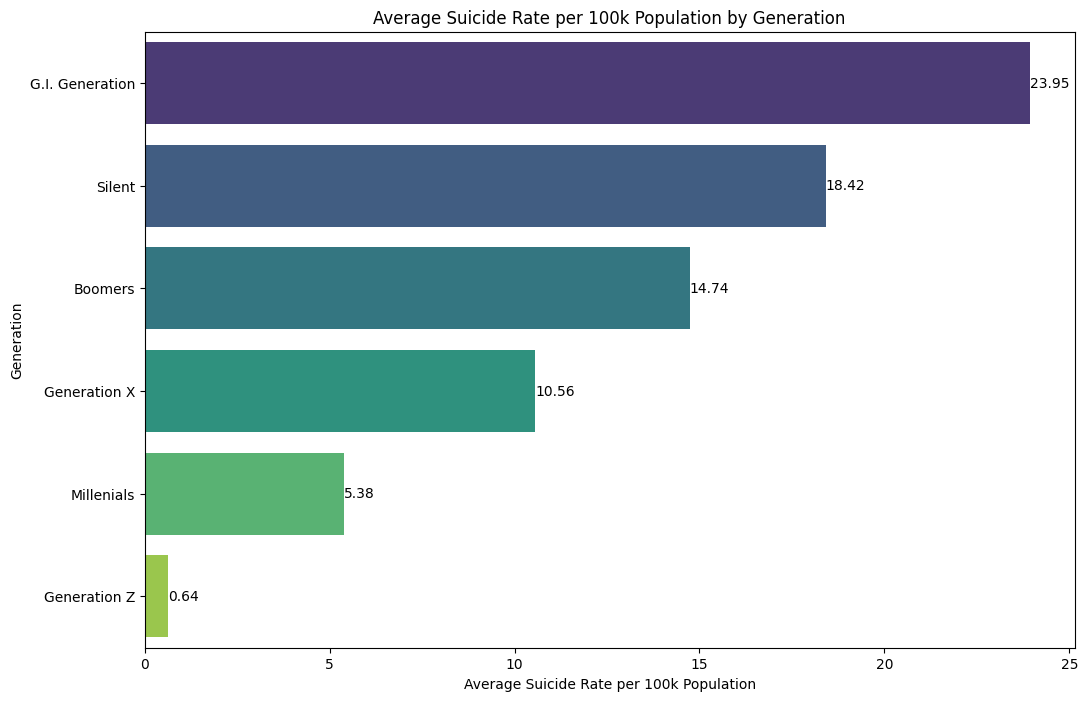

In [53]:
# Group by generation to calculate the average suicide rate per 100k population
generation_suicide_rate = df.groupby('generation')['suicides/100k pop'].mean().sort_values(ascending=False).reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=generation_suicide_rate, x='suicides/100k pop', y='generation', palette='viridis')

# Add titles and labels
plt.title('Average Suicide Rate per 100k Population by Generation')
plt.xlabel('Average Suicide Rate per 100k Population')
plt.ylabel('Generation')

# Add values on top of the bars
for index, value in enumerate(generation_suicide_rate['suicides/100k pop']):
    plt.text(value, index, f'{value:.2f}', va='center')

# Show the plot
plt.show()

The G.I. Generation, encompassing individuals born between 1900 and 1924, and the Silent Generation, born between 1925 and 1944, exhibit higher suicide rates. This phenomenon can likely be attributed to the unique challenges they faced during their lifetimes, including the hardships of World Wars and the Great Depression.

Conversely, the suicide rates are lower among Generation Z, born between 1997 and 2010, Generation X, born between 1965 and 1980, and Millennials, born between 1981 and 1996. This contrast may be influenced by the advent of technological advancements and the presence of positive societal changes that have contributed to a more supportive environment for mental well-being in these generation

### Conclusion

The analysis of global suicide data reveals key insights:

- **Regional Disparities**: The Russian Federation and the United States have the highest suicide numbers, while countries like Lithuania, Sri Lanka, and Belarus have the highest rates per 100k population.
- **Temporal Trends**: Suicides peaked in the late 1990s and early 2000s, followed by a gradual decline.
- **Age and Gender**: Middle-aged individuals (35-54 years) and older adults (75+ years) have the highest suicide rates. Males consistently have higher rates than females.
- **Socio-Economic Factors**: High HDI and GDP per capita do not necessarily correlate with lower suicide rates, indicating the influence of cultural and social factors.
- **Generational Differences**: Older generations (G.I. and Silent) show higher suicide rates, while younger generations (Gen Z, Gen X, and Millennials) have lower rates.

These findings highlight the need for targeted mental health interventions, improved data collection, and increased awareness to address the global challenge of suicide effectively.

## Author
**[Mostafizur Rahman](https://www.linkedin.com/in/mostafizrahman10/)**